In [339]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [340]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [341]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

In [342]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)
listResult = list()

In [351]:
modelsName = c("*fourier*", "*wavelets*", "*ssa*", "*emdrp*", 
               #"*emdmi*", 
               "*forcedec*")
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

In [352]:
listResult

,testId,tech,paramIdx,param,mddl,mda,mae_md,rmse_md,mae,rmse,dist
9,1,fourier,9,"9,2,20",0.222094023,0.1547876,0.001717942,0.1547876,0.001961014,0.004164126,0.21383988
3,2,fourier,3,"3,2,20",0.237994365,0.2984126,0.004152220,0.2984126,0.004415237,0.007184849,0.18906664
50,3,fourier,50,"50,2,20",0.053940559,0.4408821,0.008071888,0.4408821,0.008153183,0.010082361,0.10490195
30,4,fourier,30,"30,2,20",-0.277152250,0.7472300,0.013638149,0.7472300,0.013694595,0.016932093,0.12066078
36,5,fourier,36,"36,2,20",0.100154914,1.1683789,0.021179569,1.1683789,0.021195683,0.026420165,0.22253708
40,6,fourier,40,"40,2,20",-0.221506432,1.6119336,0.029613192,1.6119336,0.029584035,0.036416810,0.28313190
8,7,fourier,8,"8,2,20",0.089012787,0.1879801,0.002479143,0.1879801,0.002713955,0.004816765,0.19904418
49,8,fourier,49,"49,2,20",-0.185733082,0.7637246,0.013901032,0.7637246,0.014101051,0.017591076,0.14758741
24,9,fourier,24,"24,2,20",-0.446836382,15.6676349,0.318322744,15.6676349,0.316625792,0.352384844,0.21284058
28,10,fourier,28,"28,2,20",0.100853309,15.6836094,0.318098612,15.6836094,0.316404746,0.352709514,0.20930750


pdf 
  2

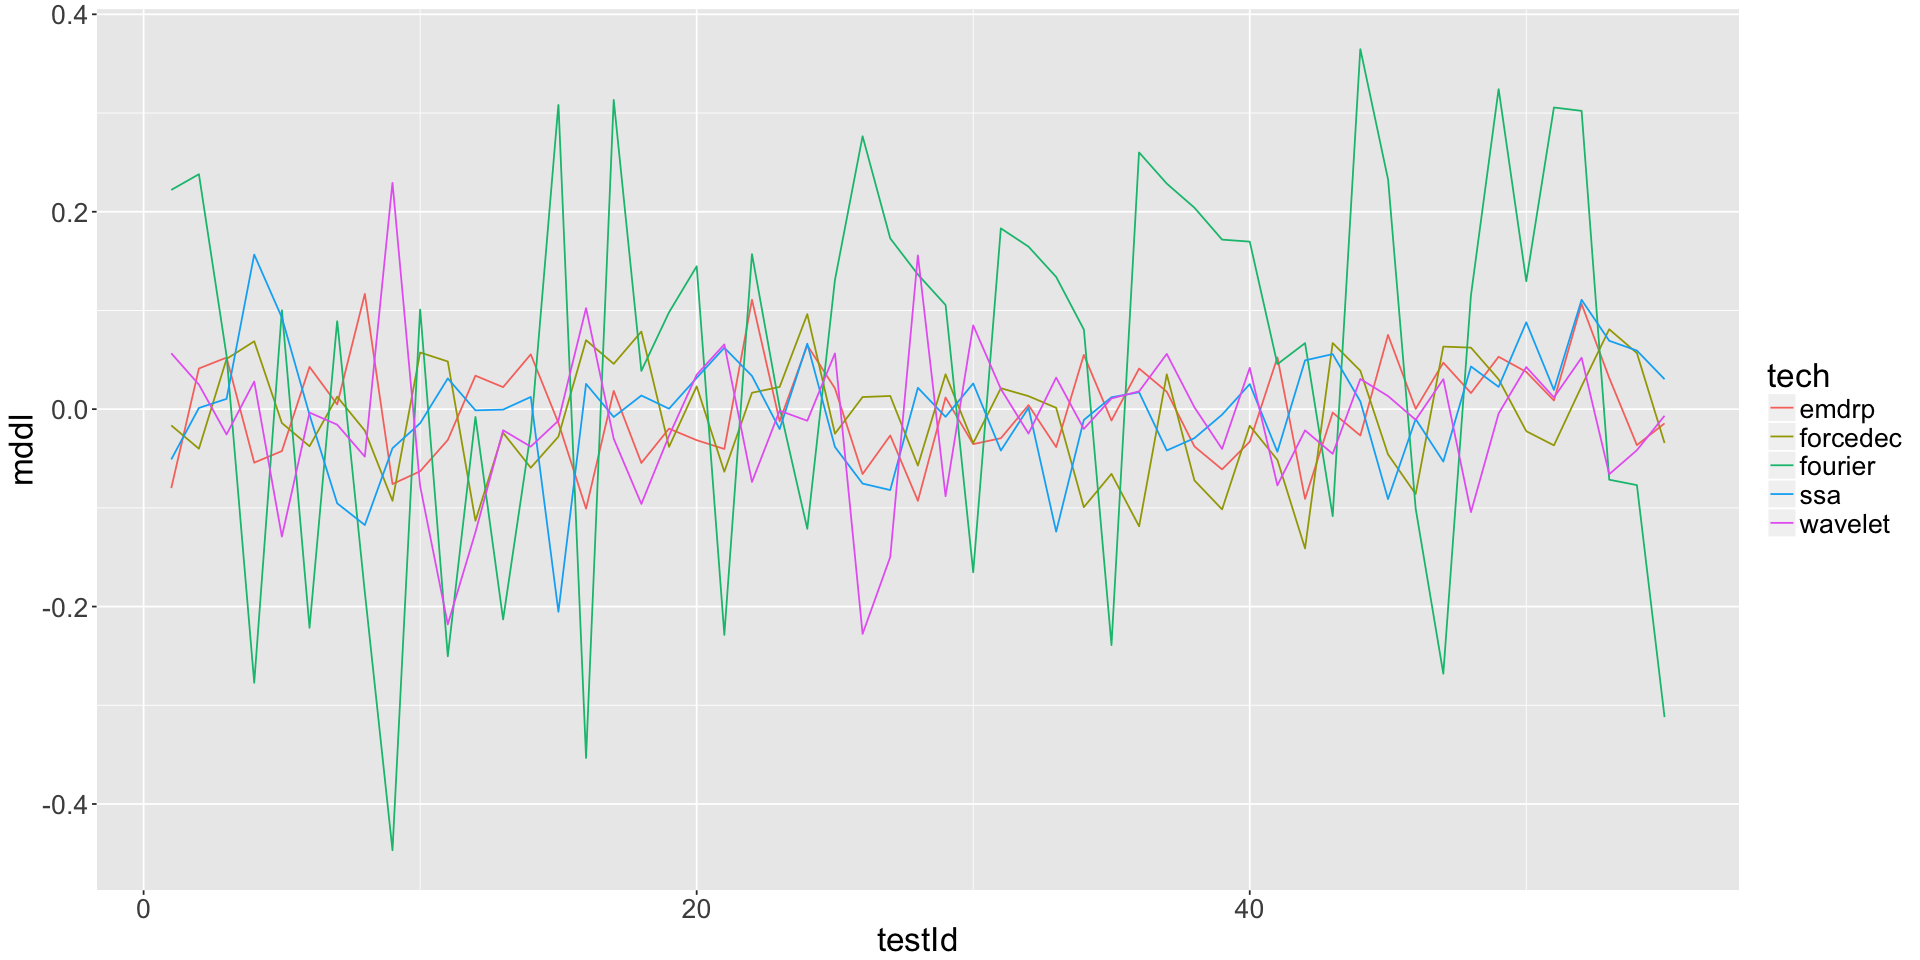

In [353]:

data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

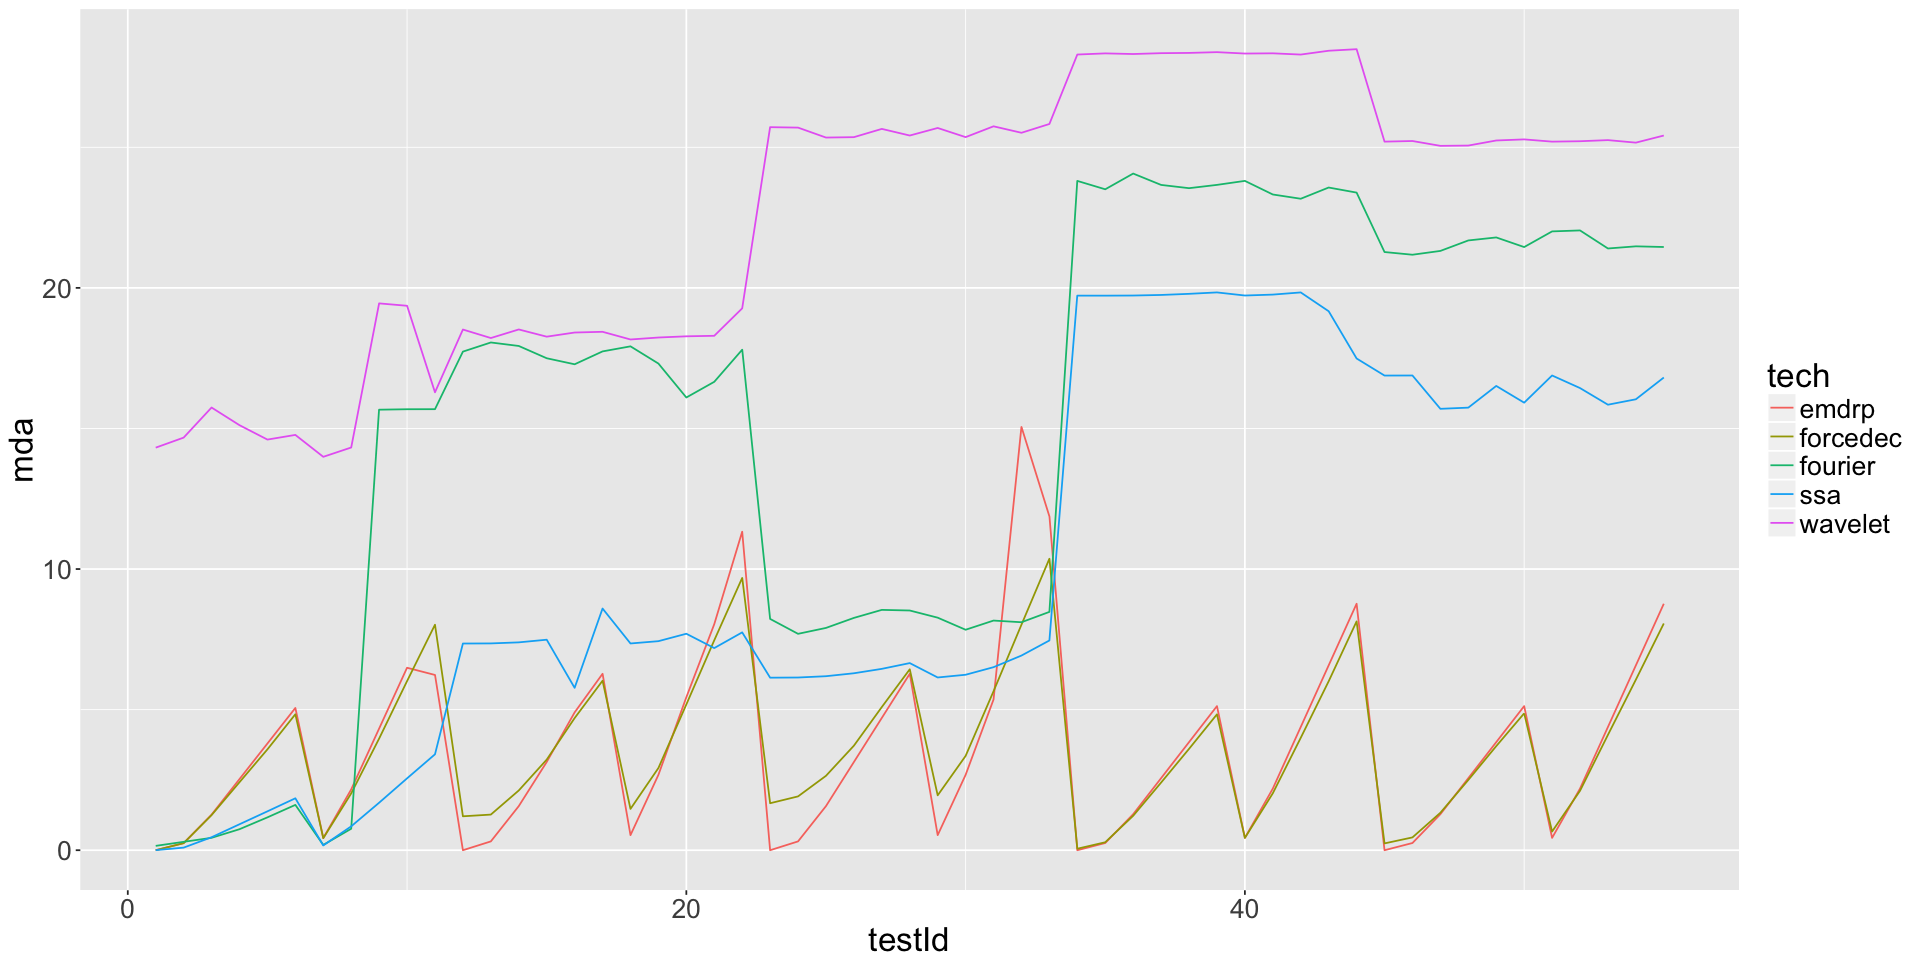

In [354]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

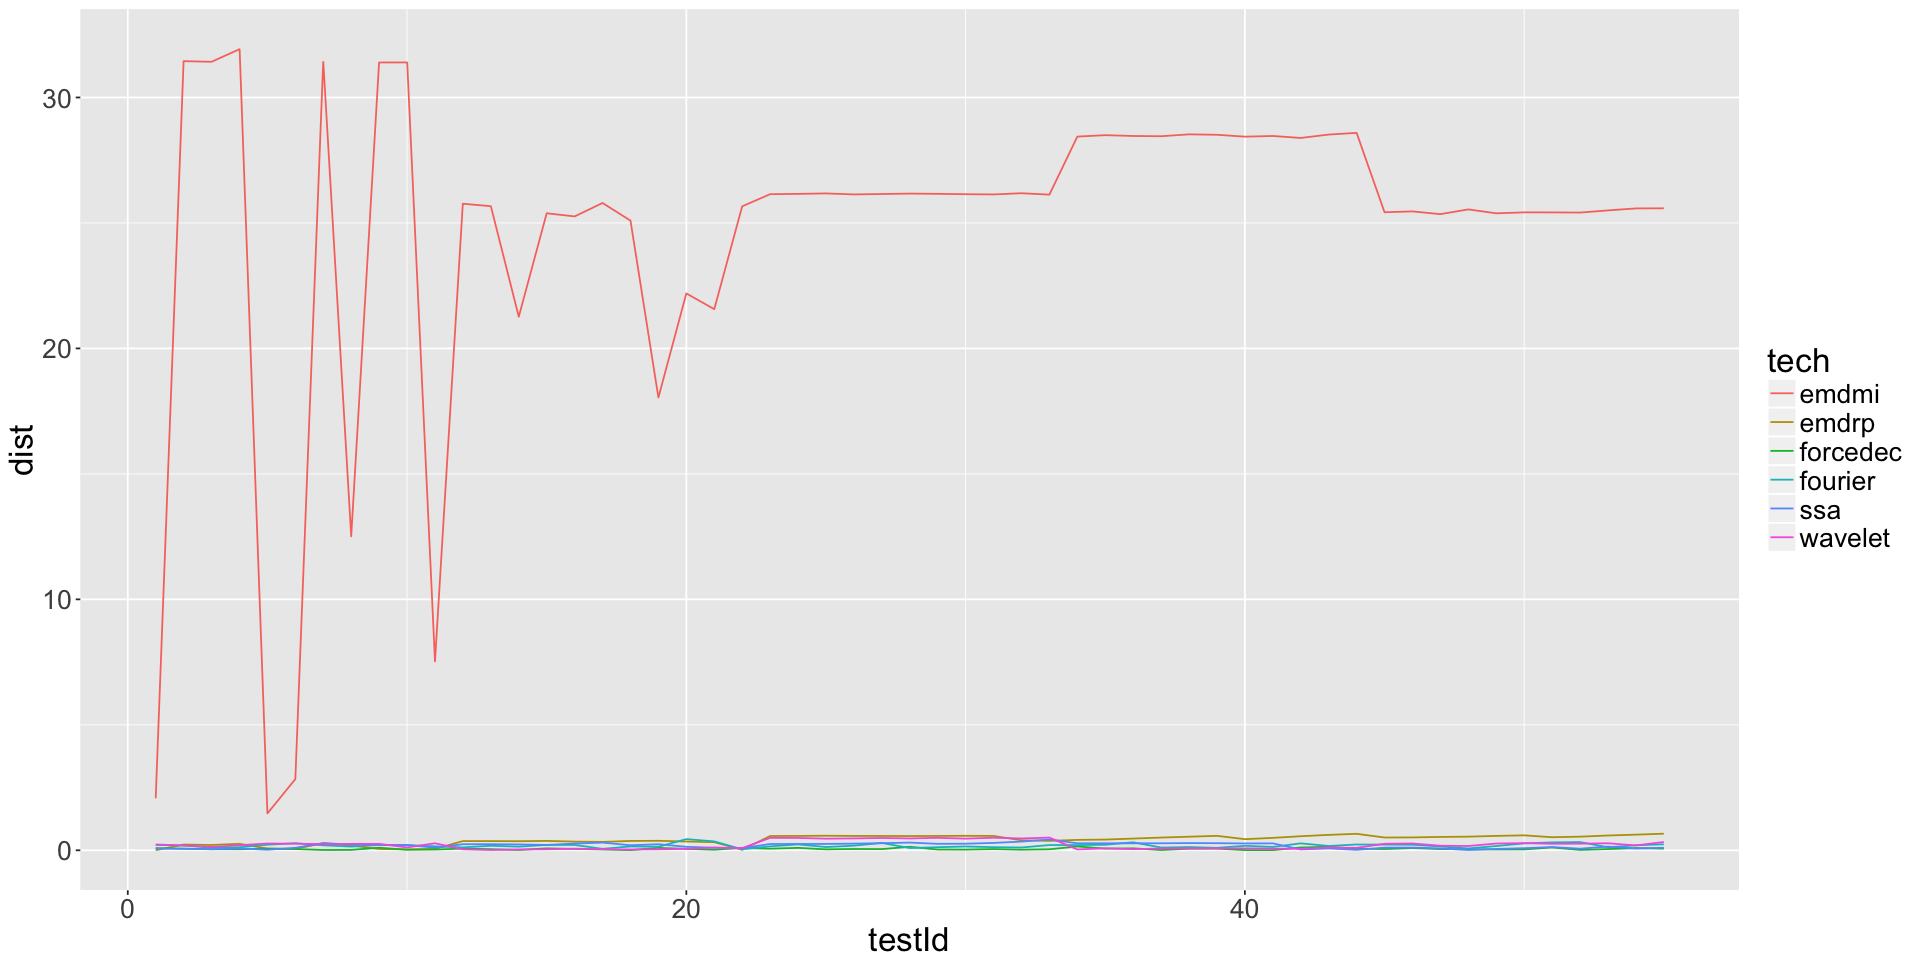

In [350]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
p = ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_line() + theme(text = element_text(size=20))
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist.pdf", sep='/'), width=16, height=5)

pdf 
  2

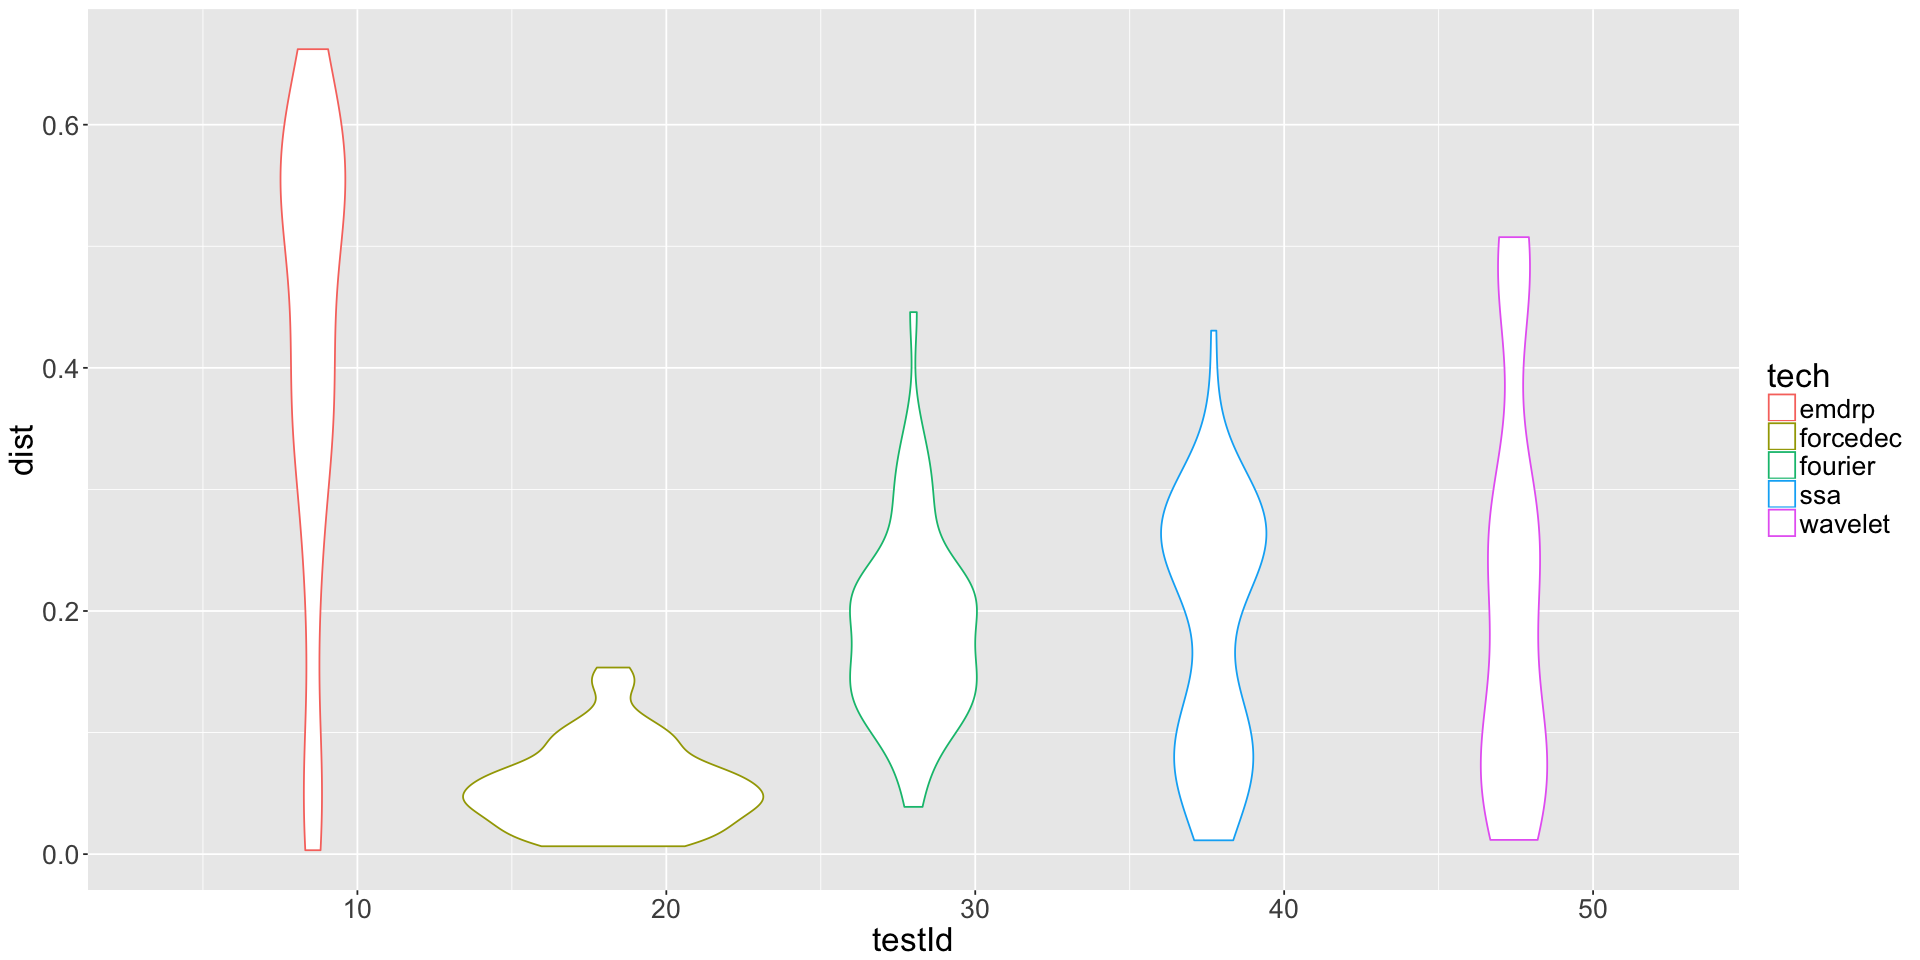

In [356]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)

ERROR: Error in if (axes) {: argumento não é interpretável como lógico


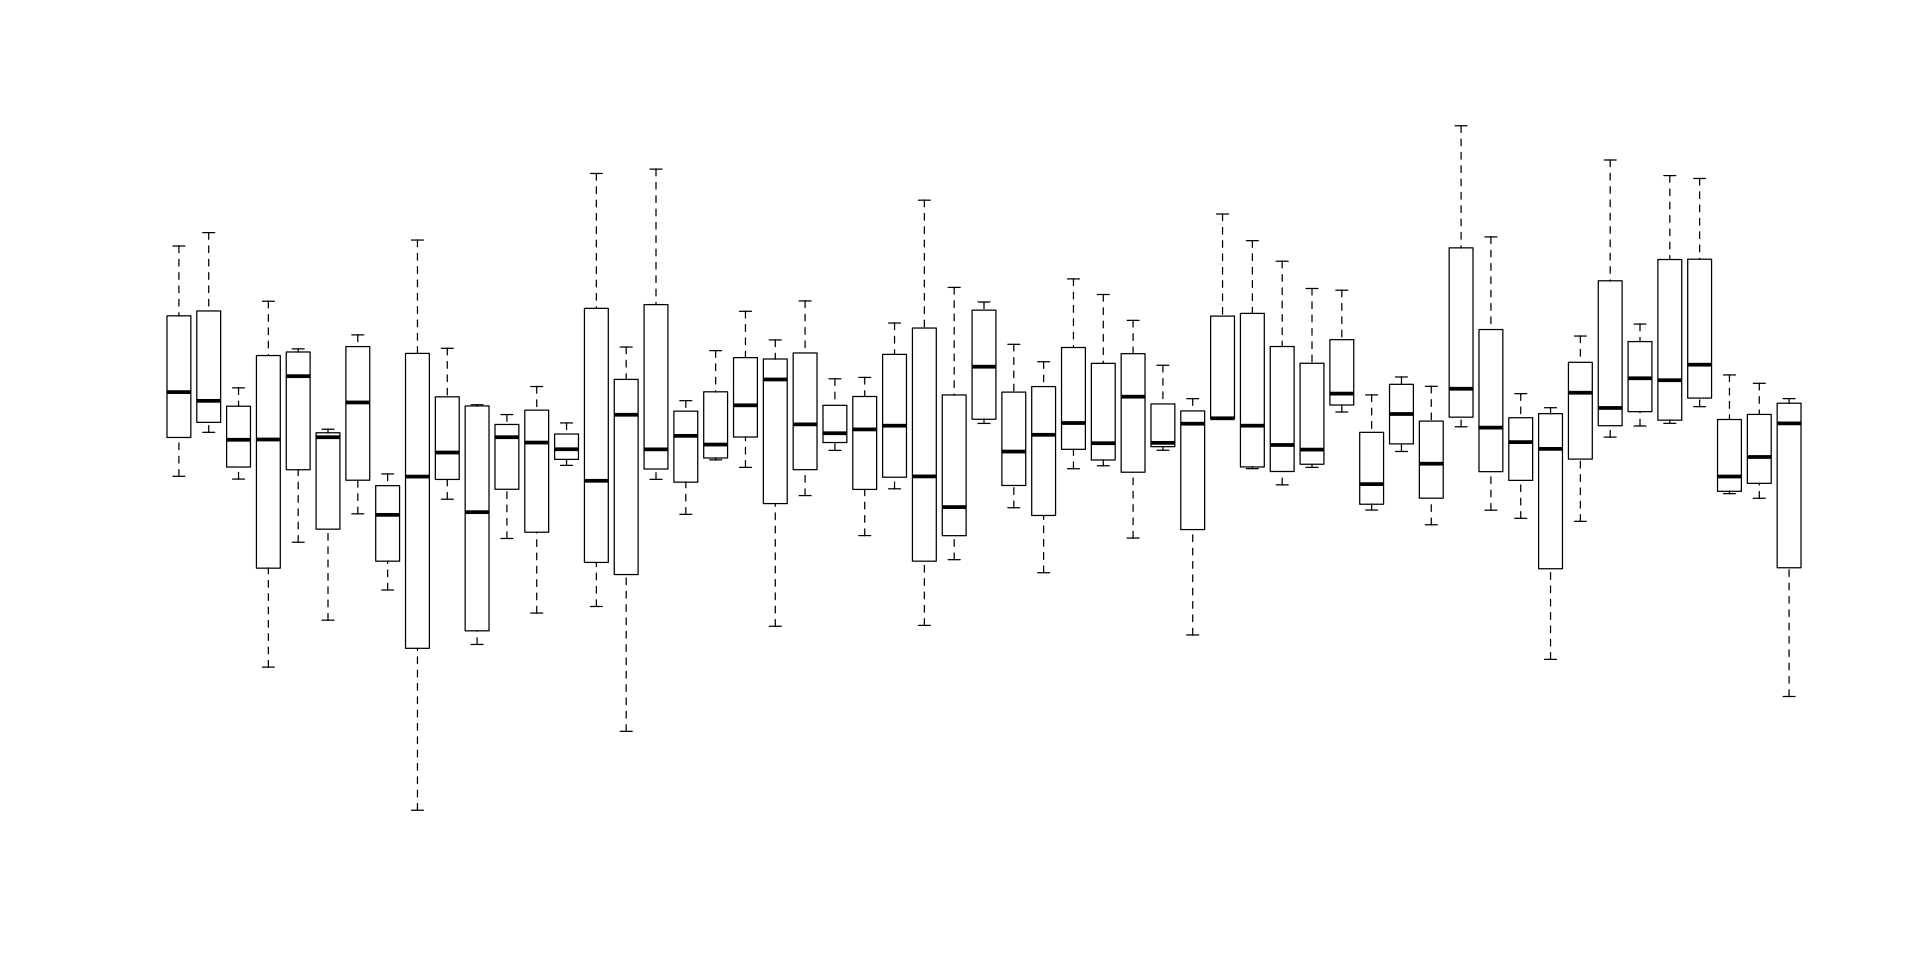

In [164]:
options(repr.plot.width=16, repr.plot.height=8)
boxplot(t(mddl), t="l", axes = F, xlab="", ylab="")
title(xlab="Techniques", ylab="MDDL", cex.lab=1.5, cex.sub=1.5) 
axis(1, cex.axis=1.5)
axis(2, cex.axis=1.5)
box()
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_techniques.pdf", sep='/'), width=16, height=5)